# imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from collections import Counter
from collections import defaultdict
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import BallTree
from sklearn.neighbors import KNeighborsClassifier
import time
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


# Classification example

Classification is a superviesd machine learning technique, that we have many points and every point assigned to class when we get a new point and we don't know what class this point belong to then we calculate the distance from this point to each class and assign this point to the clossest class. 
in KNN algorithm we choose first k nearst point and get the majority vote and assign this point to the winner class from this vote

In [2]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]


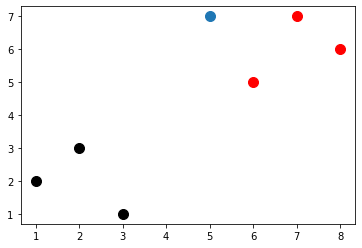

In [3]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)
plt.show()

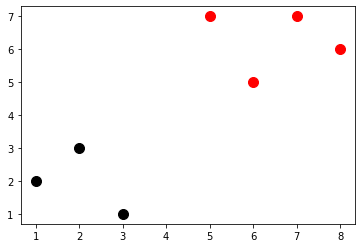

In [4]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]

min_dist=np.infty
label='b'
for y,point in dataset.items():
  dist=np.linalg.norm(np.array(new_features)-np.array(point))
  if dist<min_dist:
    min_dist=dist
    label=y

plt.scatter(new_features[0], new_features[1], s=100, color = label)  
plt.show()

in this example we have two classes(red and black) and get new point(blue) then we clalculate distance between this point and original points and get the nearest one(here we choose k=1),owww the nearist point is red then our new point would belong to red class

# Different implementations of KNN tested on breast_cancer dataset

i will play with three implementations of KNN, first sklearn implementation then my implementation and the most challenge one BallTree implementation

In [5]:
#load breast cancer dataset from sklearn datasets 
data =datasets.load_breast_cancer() 
X = data.data
y = data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

## KNN from sklearn 

In [6]:
start = time.time()
Knn = KNeighborsClassifier(3)
Knn.fit(X_train, y_train)
y_pred=Knn.predict(X_test)
print("Classification report : ",classification_report(y_test,y_pred),"Confusion matrix: ",confusion_matrix(y_test,y_pred),sep='\n')
print('Entire job took:',time.time() - start,'seconds')

Classification report : 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Confusion matrix: 
[[ 57   6]
 [  4 104]]
Entire job took: 0.1130063533782959 seconds


## My implementation to KNN
>- cites :https://pythonprogramming.net/programming-k-nearest-neighbors-machine-learning-tutorial/

my class is inherited from BaseEstimator and contain  get_params method just to allow us to use grid search,
don't worry we talk about grid search later in this tutorial 

In [7]:
class MYKNN(BaseEstimator):
  def __init__(self,n_neighbors= 3):
    self.k=n_neighbors
    self.dict_data=defaultdict(list)


  def get_params(self,deep=False):
    return {'n_neighbors':self.k}

  def fit(self,x,y):
    for i,label in enumerate(y):
      self.dict_data[label].append(x[i])


  def predict(self,predicts):
    if len(self.dict_data) >= self.k:
        warnings.warn('K is set to a value less than total voting groups!')

    total_votes=[]
    for predict in predicts:
      distances=[]
      for group in self.dict_data:
        for features in self.dict_data[group]:
          euclidean_distance=np.linalg.norm(np.array(features)-np.array(predict))
          distances.append([euclidean_distance,group])

      votes = [i[1] for i in sorted(distances)[:self.k]]
      vote_result =Counter(votes).most_common()[0][0]
      total_votes.append(vote_result)
    return total_votes

In [ ]:
start=time.time()
knn=MYKNN()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("Classification report : ",classification_report(y_test,y_pred),"Confusion matrix: ",confusion_matrix(y_test,y_pred),sep='\n')
print('Entire job took:',time.time() - start,'seconds')

Classification report : 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Confusion matrix: 
[[ 57   6]
 [  4 104]]
Entire job took: 0.5831351280212402 seconds


## KNN with BallTree
>- this is the most challenger KNN, where this is the faster one but very complicated implementation.
if you curious to know how it work just watch this video 
https://www.youtube.com/watch?v=fy40y3UFkNE&list=PLk4NKWKGOPOueHryHXnKDNPV2heedC16K&index=8




In [8]:
class KNN_BallTree:
    def __init__(self,k=3):
        self.k = k
        self.predictions = []

    def fit(self, X_train, y_train):        
        self.X_train = X_train
        self.y_train = y_train
        self.tree = BallTree(X_train,p=2)

    def predict(self, testing_data):
        indexes = self.tree.query(testing_data, self.k, return_distance=False)
        y_answers = self.y_train[indexes]
        self.predictions =  np.apply_along_axis(lambda x:Counter(x).most_common()[0][0], 1, y_answers)
        return self.predictions

In [9]:
start = time.time()
cls = KNN_BallTree()
cls.fit(X_train, y_train)
y_pred=cls.predict(X_test)
print("Classification report : ",classification_report(y_test,y_pred),"Confusion matrix: ",confusion_matrix(y_test,y_pred),sep='\n')
print('Entire job took:',time.time() - start,'seconds')

Classification report : 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Confusion matrix: 
[[ 57   6]
 [  4 104]]
Entire job took: 0.05300283432006836 seconds


### sklearn KNN with ball_tree algorithm

In [10]:
start = time.time()
Knn = KNeighborsClassifier(3,algorithm='ball_tree')
Knn.fit(X_train, y_train)
y_pred=Knn.predict(X_test)
print("Classification report : ",classification_report(y_test,y_pred),"Confusion matrix: ",confusion_matrix(y_test,y_pred),sep='\n')
print('Entire job took:',time.time() - start,'seconds')

Classification report : 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Confusion matrix: 
[[ 57   6]
 [  4 104]]
Entire job took: 0.08800506591796875 seconds


## Comparison between three implementations for time

In [11]:
train_sizes=np.array([0.3,0.4,0.5,0.6,0.7,0.8,0.9])

sk_time=[]
myknn_time=[]
ballTree_time=[]
X_repeated=np.repeat(X, 5,axis=0)
y_repeated=np.repeat(y, 5,axis=0)

X_large,X_test,y_large,y_test=train_test_split(X_repeated,y_repeated,test_size=0.2,random_state=42,shuffle=True)

for size in train_sizes:
  X_train,_,y_train,_=train_test_split(X_large,y_large,train_size=size,random_state=42,shuffle=True)
  
  start = time.time()
  Knn = KNeighborsClassifier(3)
  Knn.fit(X_train, y_train)
  y_pred=Knn.predict(X_test)
  sk_time.append(time.time() - start)


  start=time.time()
  knn=MYKNN()
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  myknn_time.append(time.time() - start)


  start = time.time()
  cls = KNN_BallTree()
  cls.fit(X_train, y_train)
  y_pred=cls.predict(X_test)
  ballTree_time.append(time.time() - start)

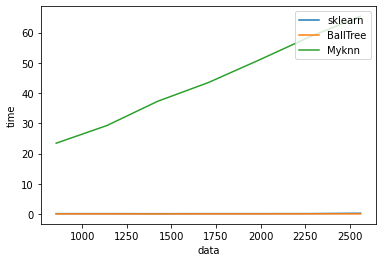

In [13]:
plt.plot(train_sizes*len(X_repeated),sk_time,label='sklearn')
plt.plot(train_sizes*len(X_repeated),ballTree_time,label='BallTree')
plt.plot(train_sizes*len(X_repeated),myknn_time,label='Myknn')
plt.xlabel('data')
plt.ylabel('time')
plt.legend(loc=1)
plt.show()

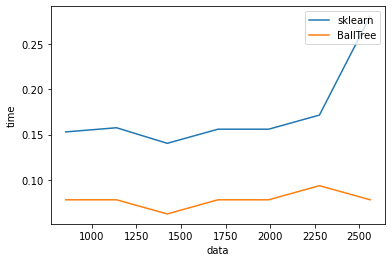

In [14]:
plt.plot(train_sizes*len(X_repeated),sk_time,label='sklearn')
plt.plot(train_sizes*len(X_repeated),ballTree_time,label='BallTree')
plt.xlabel('data')
plt.ylabel('time')
plt.legend(loc=1)
plt.show()

conclusion
>the three implementation with the same data and number of k will produce the same results but differ in time 

# EDA on breast cancer dataset

In [ ]:
data =datasets.load_breast_cancer() 
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Diagnosis']=data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
mean_col = list(df.columns[0:10])
mean_col.append('Diagnosis')
error_col = list(df.columns[10:20])
error_col.append('Diagnosis')
worst_col = list(df.columns[21:-1])
worst_col.append('Diagnosis')

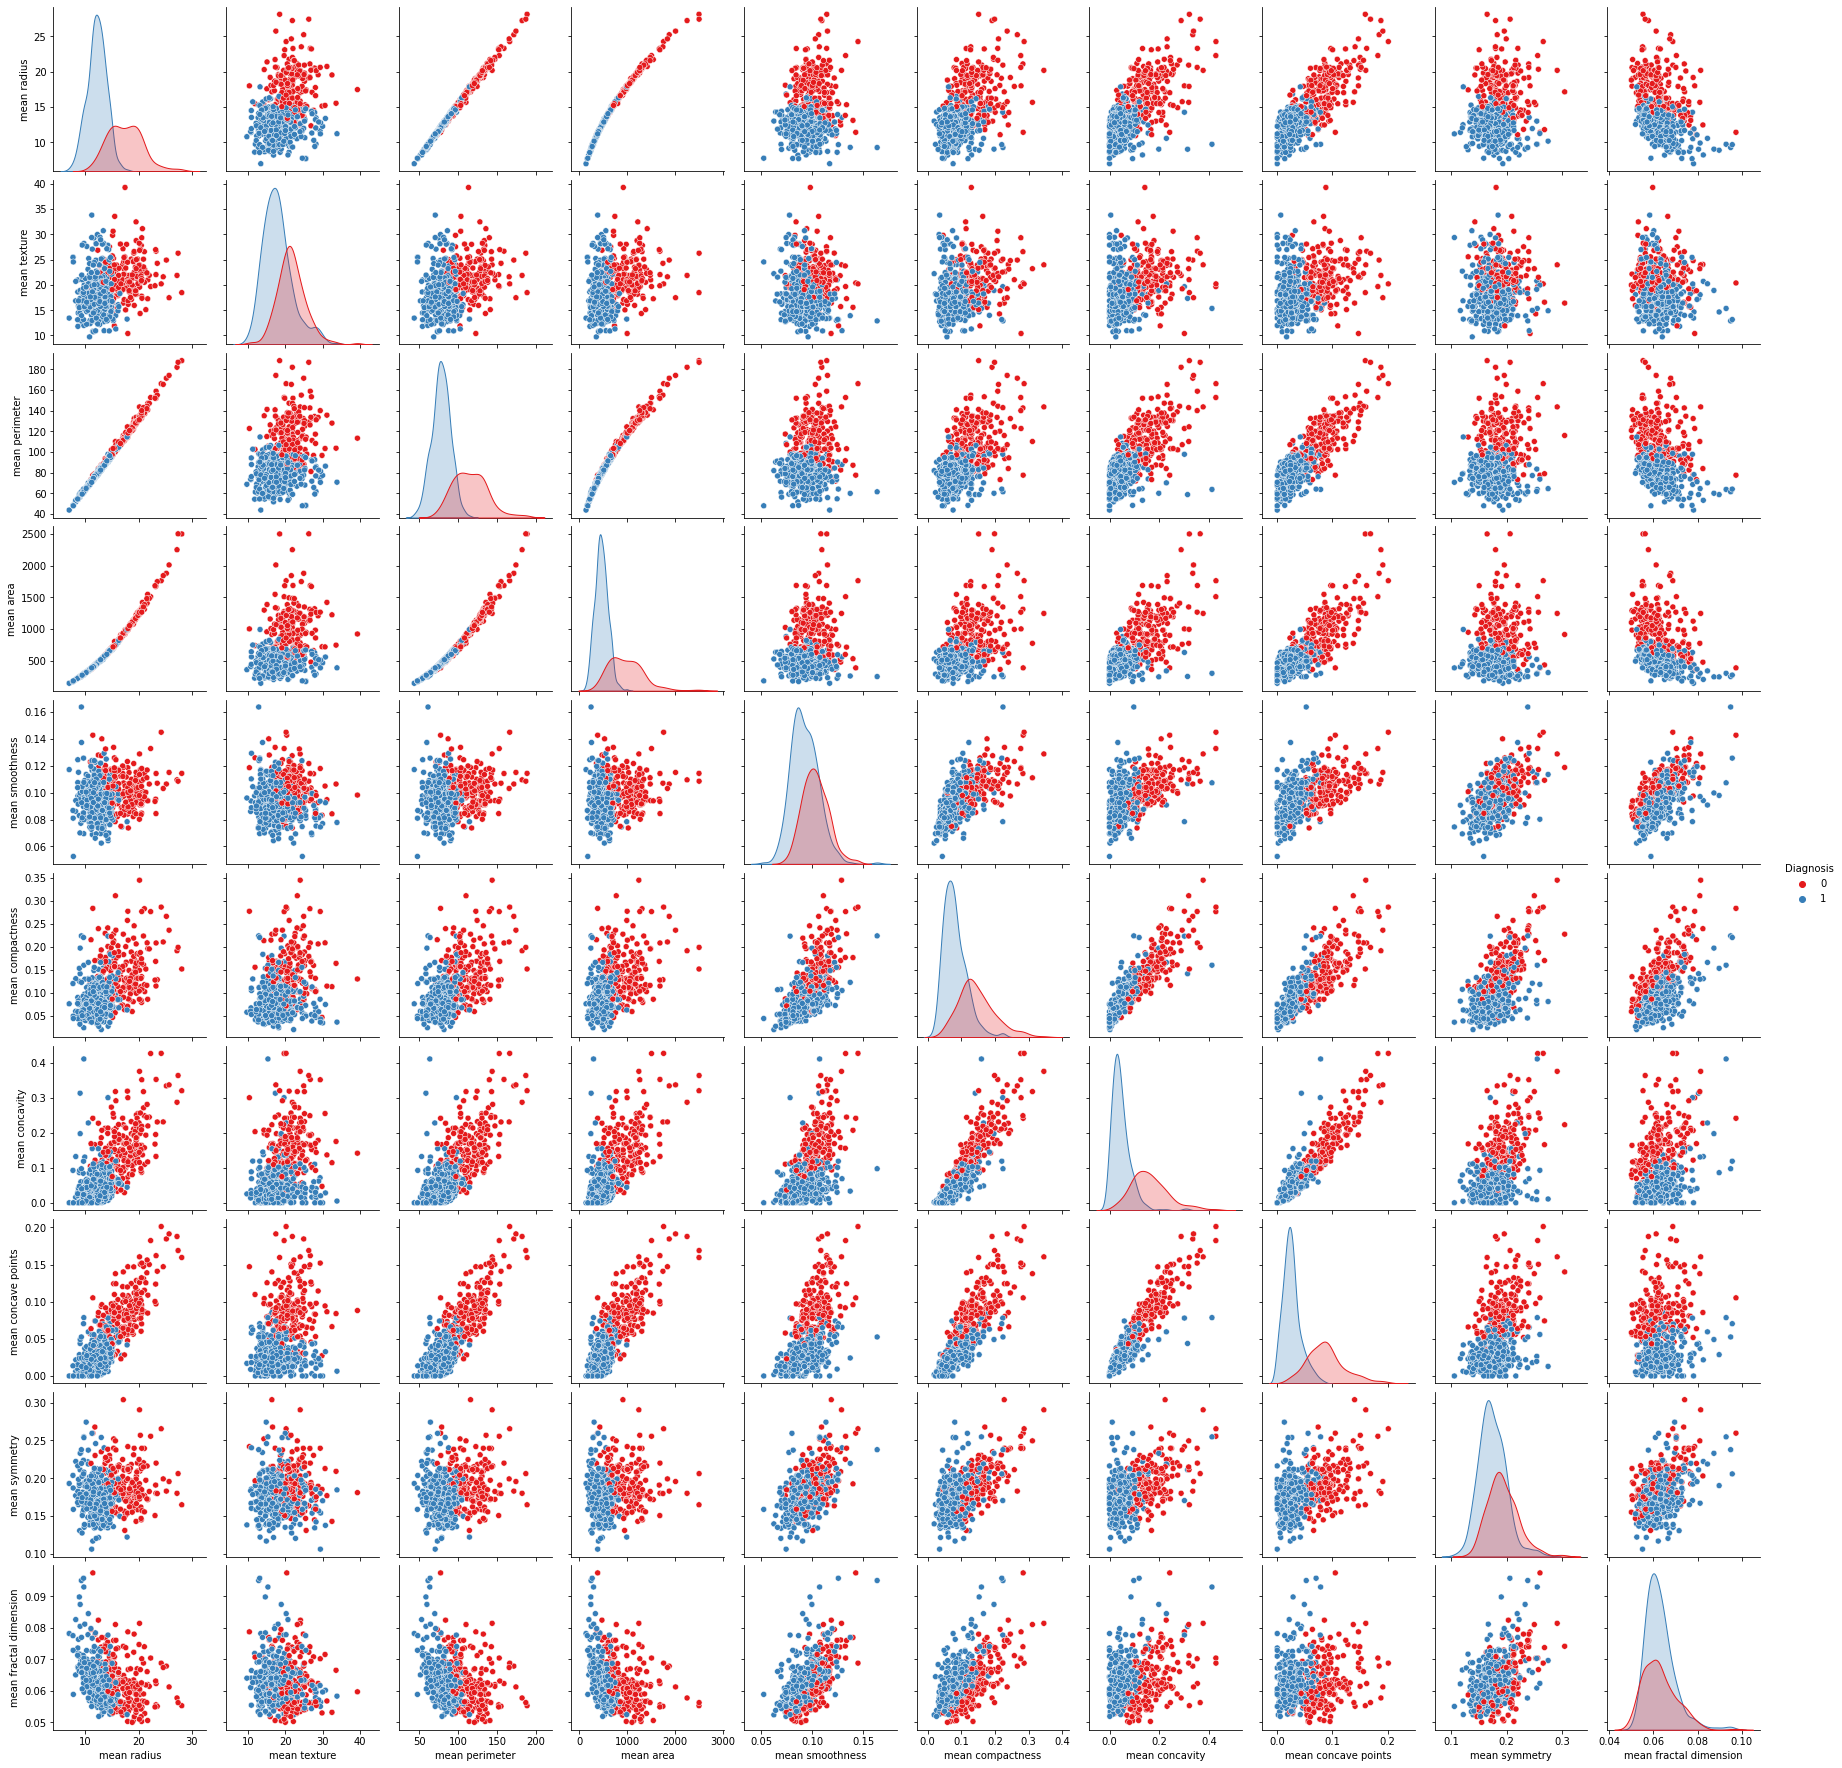

In [ ]:
sns.pairplot(df[mean_col], diag_kind="kde", kind="scatter", palette="Set1", hue = 'Diagnosis')

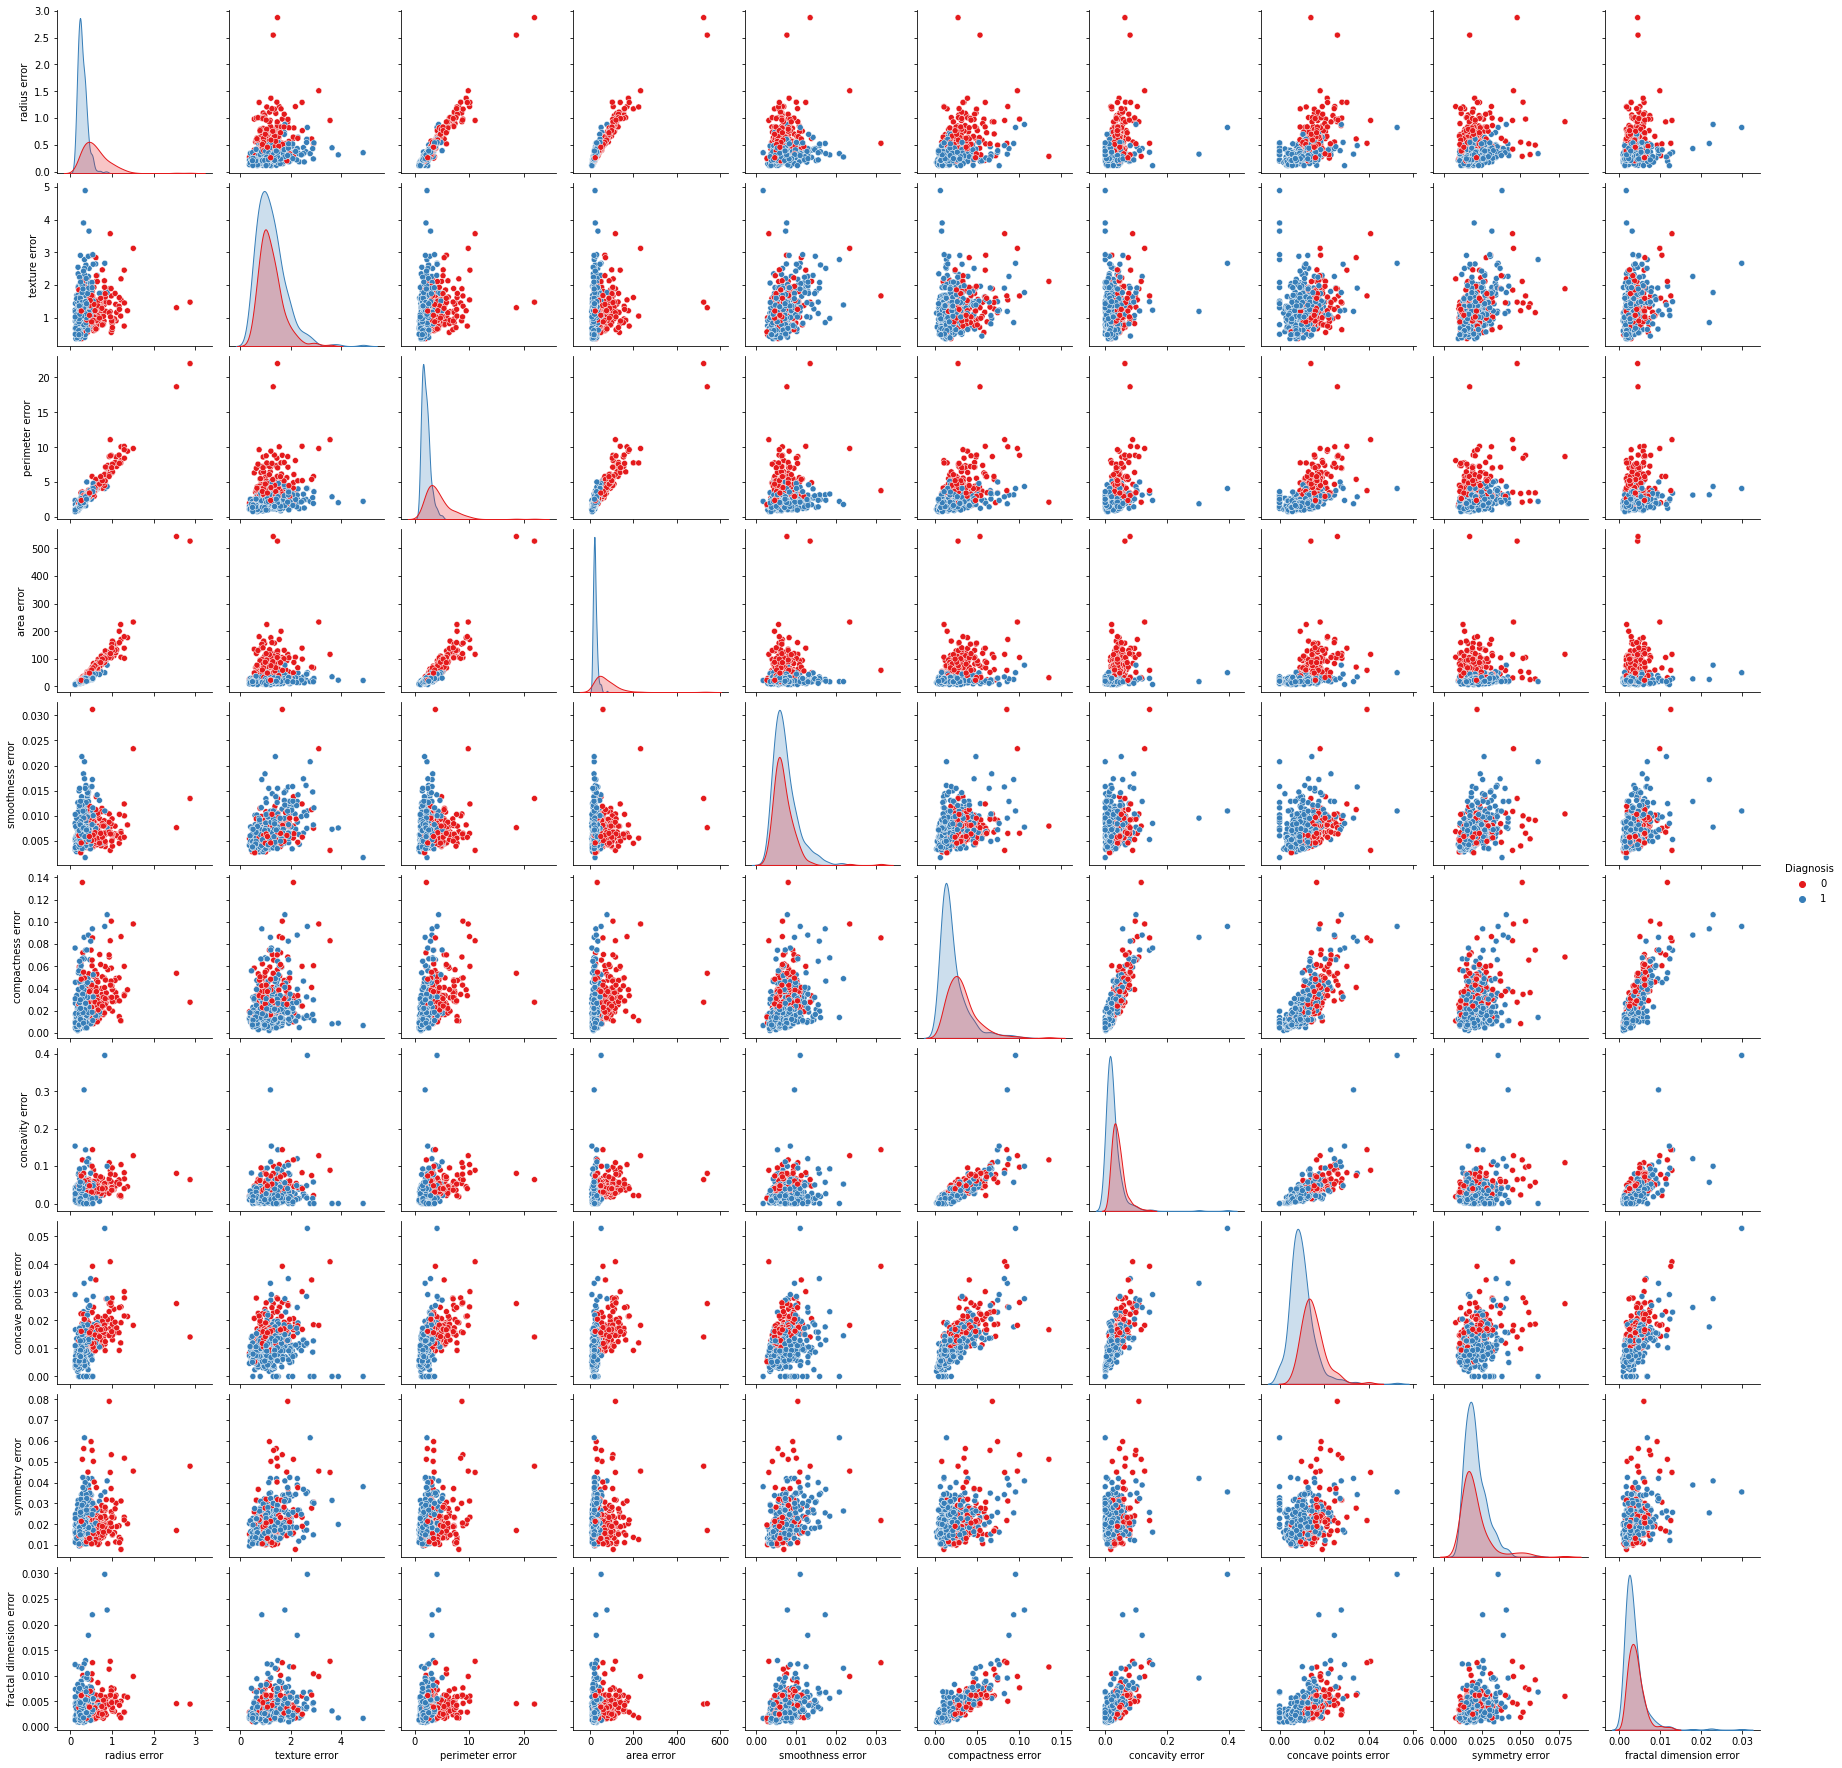

In [ ]:
sns.pairplot(df[error_col], diag_kind="kde", kind="scatter", palette="Set1", hue = 'Diagnosis')

from this pair plots we found that most columns that classifiy the data is the "mean columns"

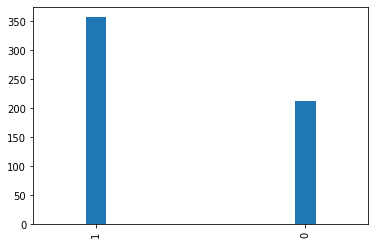

In [ ]:
df.Diagnosis.value_counts().plot(kind="bar",width=0.1)

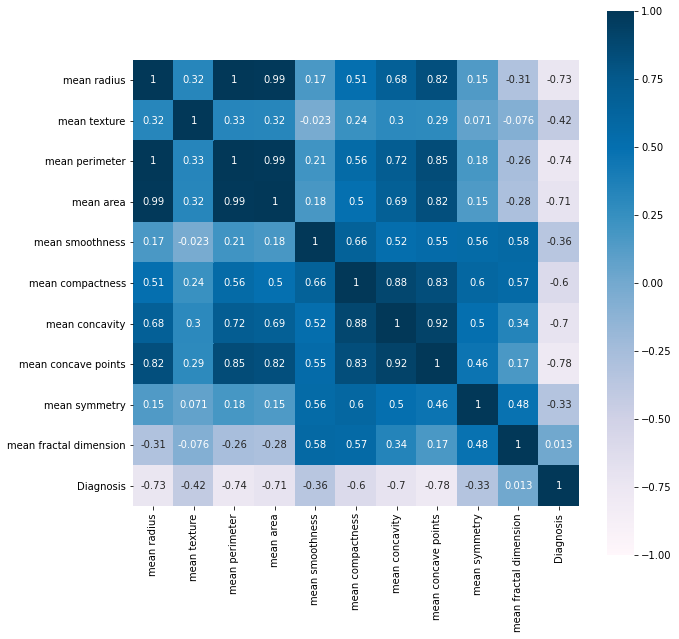

In [ ]:
corr=df[mean_col].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,square=True,cmap='PuBu')

from correlation we found that 
>- mean radius and mean perimeter and mean area are very  correlated to each other.

>- mean concavepoint and mean concavity and mean compactness are very correlated to each other


mean radius                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
mean texture              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
mean perimeter            AxesSubplot(0.390714,0.536818;0.110714x0.343182)
mean area                 AxesSubplot(0.523571,0.536818;0.110714x0.343182)
mean smoothness           AxesSubplot(0.656429,0.536818;0.110714x0.343182)
mean compactness          AxesSubplot(0.789286,0.536818;0.110714x0.343182)
mean concavity                  AxesSubplot(0.125,0.125;0.110714x0.343182)
mean concave points          AxesSubplot(0.257857,0.125;0.110714x0.343182)
mean symmetry                AxesSubplot(0.390714,0.125;0.110714x0.343182)
mean fractal dimension       AxesSubplot(0.523571,0.125;0.110714x0.343182)
Diagnosis                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

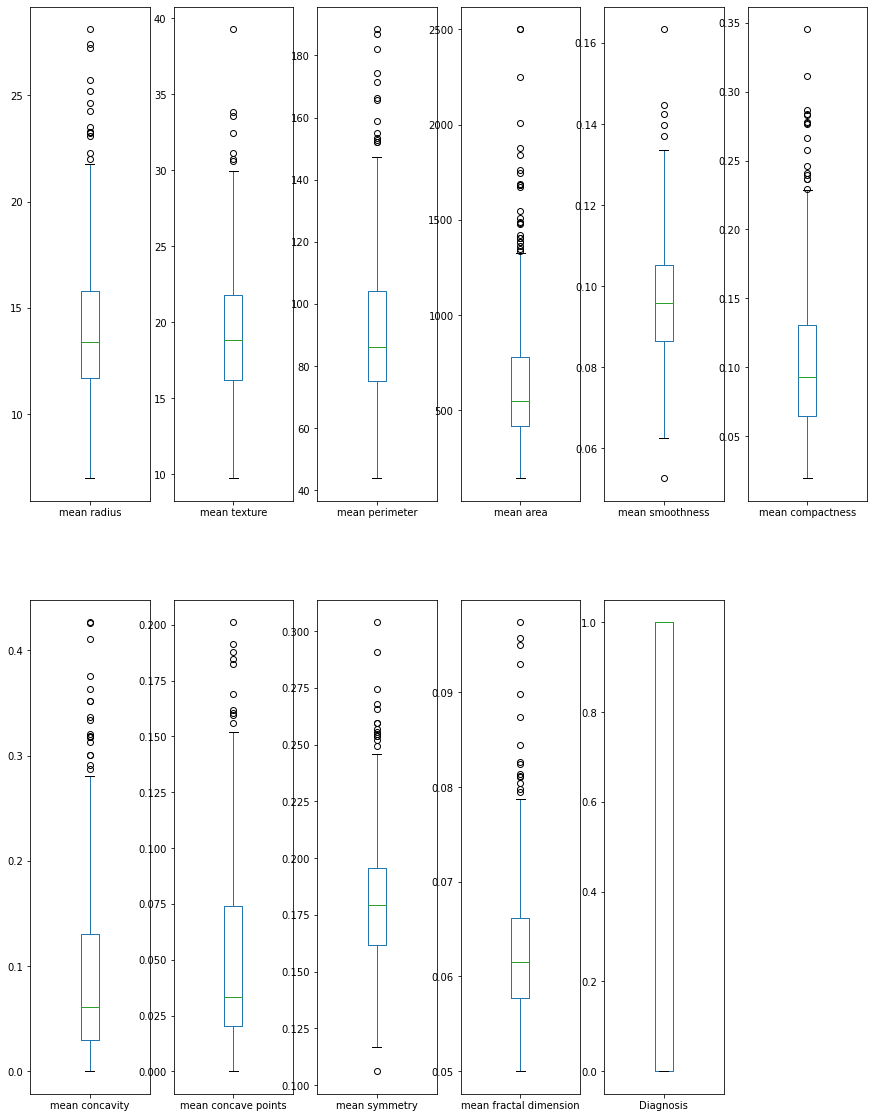

In [ ]:
df[mean_col].plot(kind= 'box' , subplots=True, layout=(2,6), sharex=False, sharey=False, figsize=(15,20))

from this box plot and pervious correlation we decided to drop 
>- mean area 
>- mean radius
>- mean concavity
>- mean concave points

In [ ]:
new_data=df[mean_col].drop(['mean area','mean radius','mean concavity','mean concave points'],1)

In [ ]:
new_data.head()

,mean texture,mean perimeter,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,Diagnosis
0,10.38,122.80,0.11840,0.27760,0.2419,0.07871,0
1,17.77,132.90,0.08474,0.07864,0.1812,0.05667,0
2,21.25,130.00,0.10960,0.15990,0.2069,0.05999,0
3,20.38,77.58,0.14250,0.28390,0.2597,0.09744,0
4,14.34,135.10,0.10030,0.13280,0.1809,0.05883,0


# transform features

In [ ]:

trans_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
# ('std_scaler', MinMaxScaler()),
])


# modeling

## test my model with new features

In [ ]:
X,y=np.array(new_data.drop('Diagnosis',1)),np.array(new_data['Diagnosis'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
X_train=trans_pipeline.fit_transform(X_train)
X_test=trans_pipeline.transform(X_test)

In [ ]:
Knn = MYKNN(3)
Knn.fit(X_train, y_train)
y_pred=Knn.predict(X_test)
print("Classification report : ",classification_report(y_test,y_pred),"Confusion matrix: ",confusion_matrix(y_test,y_pred),sep='\n')


Classification report : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Confusion matrix: 
[[39  4]
 [ 4 67]]


this is the same accuracy with all features

## try to get best param to MYKNN with grid search

grid search is a way to get the best hyperparameters

In [ ]:
knn = MYKNN()
param_grid ={'n_neighbors':list(range(1, 31))}
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred=grid.predict(X_test)
print("Classification report : ",classification_report(y_test,y_pred),"Confusion matrix: ",confusion_matrix(y_test,y_pred),sep='\n')


Classification report : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Confusion matrix: 
[[39  4]
 [ 4 67]]


In [ ]:
grid.best_estimator_

MYKNN(n_neighbors=3)

## try to get best param to SKlearn KNN with grid search

In [ ]:
knn =KNeighborsClassifier()
param_grid ={'n_neighbors':list(range(1, 31))}
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred=grid.predict(X_test)
print("Classification report : ",classification_report(y_test,y_pred),"Confusion matrix: ",confusion_matrix(y_test,y_pred),sep='\n')


Classification report : 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion matrix: 
[[39  4]
 [ 3 68]]


In [ ]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

## Compare sklearn model with my model 

 from this grid search my best model is performed little better than sklearn but sklearn model more faster than my model, but we can use BallTree as we discussed before

# try to overfitting my model
this step to be sure that I have understood the algorithm very well

In [ ]:
X,y=np.array(df[['compactness error','texture error']]),np.array(df['Diagnosis'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=42,shuffle=True)
X_train=trans_pipeline.fit_transform(X_train)
X_test=trans_pipeline.transform(X_test)

In [ ]:
knn = MYKNN(1)
knn.fit(X_train, y_train)
y_pred_train=knn.predict(X_train)
print("Classification report for train: ",classification_report(y_train,y_pred_train),"Confusion matrix: ",confusion_matrix(y_train,y_pred_train),sep='\n')
y_pred_test=knn.predict(X_test)
print('*'*100)
print("Classification report for test: ",classification_report(y_test,y_pred_test),"Confusion matrix: ",confusion_matrix(y_test,y_pred_test),sep='\n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: K is set to a value less than total voting groups!


Classification report for train: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        98

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

Confusion matrix: 
[[72  0]
 [ 0 98]]
****************************************************************************************************
Classification report for test: 
              precision    recall  f1-score   support

           0       0.41      0.53      0.46       140
           1       0.70      0.59      0.64       259

    accuracy                           0.57       399
   macro avg       0.56      0.56      0.55       399
weighted avg       0.60      0.57      0.58       399

Confusion matrix: 
[[ 74  66]
 [105 154]]


to overfitting my model choose feature less significant and choose k =1 , and train on less instances then test on more